# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

In [31]:
# Insert other libraries
import math, random # import math and random
from random import randrange
from collections import Counter

# set the seed for the random number generator
mySeed=13

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

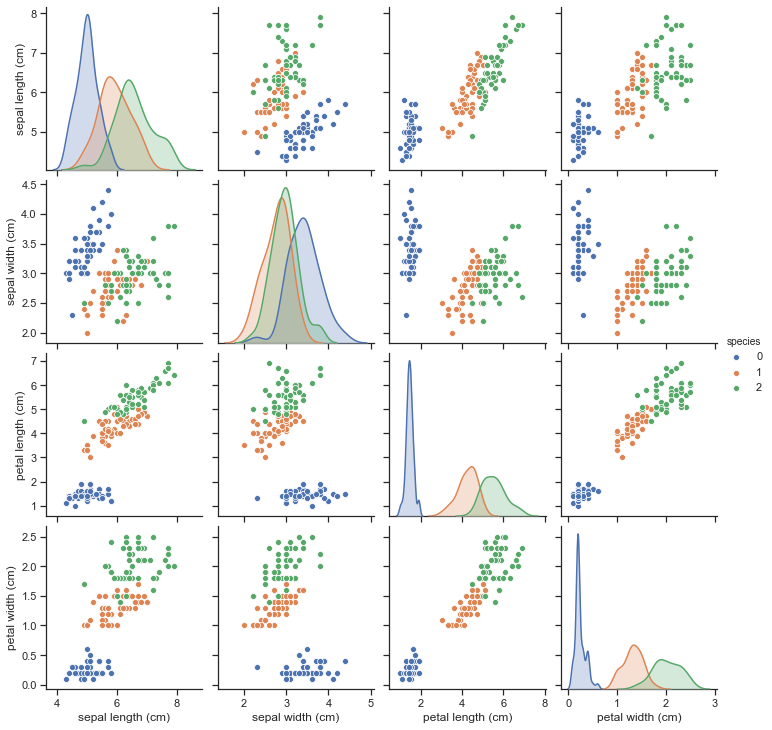

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


### Define the plotting function - myPlotGrid(X,y)
The function below will create subplots with the four selected features: 

alcohol, flavanoids, colour_intensity and ash

Plot the histograms down the diagonal

Plot the scatter plots in the other areas

Plot the wine features on the x and y axes

In [3]:
# define plotting function
def myplotGrid(X,y):
    ''' Plot multiple subplots
        input: values and labels
        ouput: Use function to plot subplots
    '''
    
    fig = plt.figure(figsize=(15,15))
    fig.suptitle("Wine Dataset Subplot Visualisation")
        
    # Legend : data by class 
    data=[]
    for plot1 in range(0,3):
        x = [X[plot2] for plot2 in range(0, len(X)) if y[plot2]== plot1]
        data.append(np.array(x))
    # Loop over the plot grid
    for plot1 in range(0, 4):
        for plot2 in range(0, 4):
            # add 4 x 4 subplot
            ax = fig.add_subplot(4, 4, plot1+plot2*4 +1)
            # loop over classes
            for label, feature in enumerate(data):  
                    # Histogram plots
                    if plot1 == plot2:                      
                        plt.hist(feature[:, plot1])
                    # Scatter plots
                    else:
                        plt.scatter(feature[:,plot1], feature[:,plot2], 
                                    label=wine.target_names[label])
            # Plot the legend top right
            if plot2 == 3 and plot2 == 0:
                plt.legend()
            # Feature name labels for x and y plot axis
            if plot2 == 3:
                ax.set_xlabel(wine.feature_names[plot1])
            if plot1 == 0:
                ax.set_ylabel(wine.feature_names[plot2])    

### Run the plotting function to visualise the data

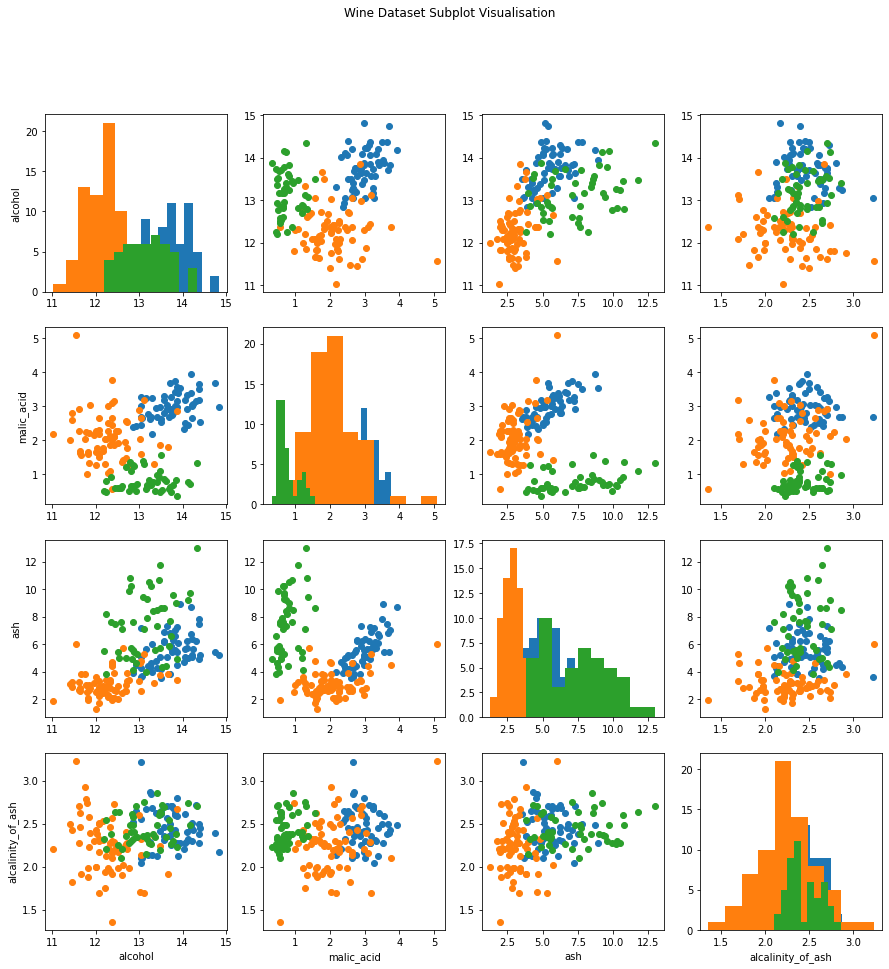

In [4]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

### Noise Code

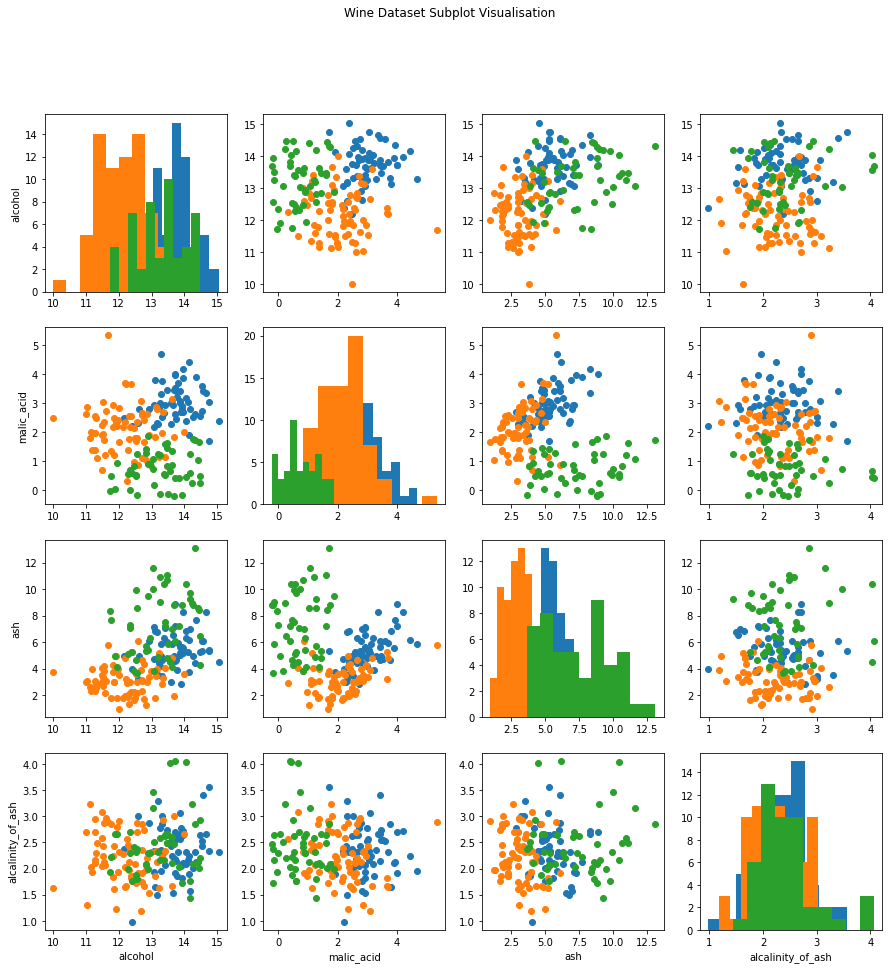

In [5]:
# noise code 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN, y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:

answer:

Based on the histograms and scatter plots of the four features above: Flavanoids and alcohol appear to be the better of the two as predictors of type.

Reasons:

1. They are nicely grouped into classes already
2. They are not correlated


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:


1. There appears to be more outliers with Gaussian noise added.
2. there is more of a spread of data with Gaussian noise.
3. The linear features are less obvious with Gaussian noise.

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


### helper code for implementing KNN

Euclidean distance function: euclid_distance

Manhattan distance function: manhat_distance

Accuracy function: myAccuracy

Train_Test_Split function: myTrain_Test_Split


In [7]:
# helper code

# Euclidean Distance
#def distanceMetrics:
def euclid_distance(a, b):
    ''' Calculate the euclidean distance of two n-dimensional vectors
        input: a and b
        output: euclidean distance
    '''
    distance = np.linalg.norm(a - b, axis = 0)
    return distance

## Manhattan Distance
def manhat_distance(a, b):
    ''' Calculate the manhattan distance of two n-dimensional vectors
        input: a and b
        output: manhattan distance
    '''
    assert len(a)==len(b), "The vectors must be the same length"
    distance = 0
    for i in range(0, len(a)):
        distance += np.abs(a[i] - b[i])
    return distance

def my_train_test_split(X, y, size):
    ''' Train test and split
        Split X and y data by specific size
        input: a, b and size = a number between 0 and 1
        output: X_train, X_test, y_train, y_test
    '''
    # test test size value
    assert (size > 0.0 and size< 1.0), "please use a test size between 0 and 1"
    # Shuffle X and y
    mySeed=13
    np.random.seed(mySeed)
    a = np.arange(X.shape[0])
    a = np.random.permutation(a)
    X = X[a]
    y = y[a]
    # Split X and y using the cut point calculated via the test size fraction  
    data = int(len(X)*(size))
    X_test = X[0:data]
    y_test = y[0:data]
    X_train = X[data:]
    y_train = y[data:]
    return (X_train, X_test, y_train, y_test)

### Run the train_test_split function

split data in X_train, X_test, y_train, y_test

In [8]:
# Split the data
X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.3)

In [9]:
X_train.shape

(125, 4)

In [11]:
y_train.shape

(125,)

In [12]:
X_test.shape

(53, 4)

In [13]:
y_test.shape

(53,)

### Create the myKNN function
returns predicted values

In [14]:
# mykNN code
def myKNN(X,y, X_, k, dist_name):
    ''' K nearest neighbor function:
    input: 
    X_train; y_train, X_test
    k = number of neighbors
    distance = 'euclidian' or 'manhattan'
    output: predicted values for test data
    '''
    # create an empty list for predicted values
    predict =[]  
    #  loop through test data 
    for x in X_test:
        neighbors=[[],[]]
        # distance euclidean or manhattan 
        if dist_name == 'euclidean':
            dist = [euclid_distance(x, j) for j in X_train]
        elif dist_name == 'manhattan':
            dist = [manhat_distance(x, j) for j in X_train]         
        # k value for neighbors
        knn_id = np.argsort(dist)[:k]
        # Get labels for knn value
        knn_label = [y_train[m] for m in knn_id]
        # Count the number of labels using bincount
        label_count = np.bincount(knn_label)
        # Append the label count to predict list
        predict.append(np.argmax(label_count))
    return np.array(predict)

### Test the data using myKNN function 

use the mytest_train_split data: X_train, Y_train, X_test

distance = euclidean

k = 10

y_pred1 = predicted values


In [17]:
y_pred1 = myKNN(X_train, y_train, X_test,10,'euclidean')

print("Predicted values: \n")
print(y_pred1)
print("\n")
print("Correct values: \n")
print(y_test)

Predicted values: 

[2 0 2 1 1 1 2 0 1 1 0 0 2 1 2 1 1 0 0 1 1 1 0 0 2 1 2 1 0 2 1 1 0 1 0 0 0
 2 1 2 1 2 1 1 0 0 1 0 1 1 2 0 1]


Correct values: 

[2 0 2 1 1 1 2 0 1 1 0 0 2 1 2 1 1 0 0 1 2 1 0 0 2 1 2 1 0 2 1 1 0 1 0 0 0
 2 1 2 1 2 1 1 0 0 1 0 1 1 2 0 1]


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


### Other Custom Functions: 

myConfMatrix : confusion matrix function

myPrecision : precision function

myRecall : recall function

In [136]:
# confusion matrix, accuracy, precision, recall, etc. 
def myAccuracy(y_test,y_pred):
    '''accuracy function
            input: list of test values, list of predicted values
            output: accuracy value
    '''
    accuracy = len(y_test[np.where(y_test==y_pred)])/len(y_pred)
      
    return accuracy

def myConfMatrix(y_test,y_pred,nClass):
    ''' confusion matrix function
        input: array of test data labels, array of predicted values, number of classes
        ouput: confusion matrix - predicted vs actual values
    '''
    # Initialise a matrix of zeros
    cm= np.zeros((nClass,nClass),dtype=int)
    # Loop over predicted values
    for i in range(0, len(y_test)):
        cm[y_test[i],y_pred[i]] +=1
    #loop over all results and update the confusion matrix
    return cm

def myPrecision(y_test,y_pred):
    ''' precision function
        input: test outputs (y_test), predicted values (y_)
        ouput: list with precision by class  
    '''
    # precision = tp / (tp +fp)
    # Get array of classes
    classes = np.unique(y_pred)
    # Get number of classes
    n = len(classes)
    # Initialise array of zeros for class by class results
    precision = np.zeros(classes.shape)
    # get confusion matrix
    cm = myConfMatrix(y_test,y_pred,n)
    # loop over the results of confusion matrix and classes
    for i in range(0,n):
        # create an empty tp_fp variable (true positive plus false positive) 
        tp_fp = 0
        for j in classes:
            # true positives(tp) + false positives(fp)
            tp_fp += cm [j][i]
        # precision = true positives(tp) / true positives(tp) + false positives(fp)
        class_precision = cm[i][i] / tp_fp
        precision[i] = class_precision
    return precision

def myRecall(y_test,y_pred):
    ''' class recall function
        input: test outputs, predicted values,
        output: returns a list with recall by class
    '''   
    # get an array of classes
    classes = np.unique(y_pred)
    # number of classes
    n = len(classes)
    # recall array with zeros
    recall = np.zeros(classes.shape)
    # get values from confusion matrix function
    cm = myConfMatrix(y_test, y_pred,n)
    # loop over the confusion matrix values and classes
    for i in range(0, n):
        # create the tp_fn variable
        tp_fn = 0
        for j in classes:
            # true positives + false negatives from the confusion matrix
            tp_fn += cm[i][j]
        # recall = true positives(tp) / true positives (tp) + false negatives (fn)
        class_recall=cm[i][i] / tp_fn
        recall[i] = class_recall
    return recall

### Test the custom functions

Confusion Matrix: MyConfMatrix

Accuracy: myAccuracy

Precision: myPrecision

Recall: myRecall

In [137]:
# test evaluation code
# Accuracy
print("my Accuracy: %0.3f" % myAccuracy(y_test, y_pred1))
print("\n")
print("my Confusion Matrix:")
cm = myConfMatrix(y_test,y_pred1,len(np.unique(y)))
print(cm)
print("\n")
print('my precision: %s' % myPrecision(y_test, y_pred1))
print("\n")
print('my recall:    %s \n\n' % myRecall(y_test, y_pred1)) 

my Accuracy: 0.981


my Confusion Matrix:
[[17  0  0]
 [ 0 23  0]
 [ 0  1 12]]


my precision: [1.         0.95833333 1.        ]


my recall:    [1.         1.         0.92307692] 





## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


### KFold Split Function
to split X, y into k folds
for KFold Cross Validation or outer fold in Nested Cross Validation

In [138]:
# Split a dataset into k folds
def KFold_split(X,y, numFolds=5):
    np.random.seed(mySeed)
    data_split = []
    list_X = list(range(X.shape[0]))
    index = np.random.permutation(list_X)
    #split = np.array_split(index, folds)
    #assert (kFolds == len(splits))
    #dataset_split = list()
    #dataset_copy = list(dataset)
    fold_size = int(len(X) / numFolds)
    for i in range(numFolds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(list_X))
            fold.append(list_X.pop(index))
        data_split.append(fold)
    return data_split

### Test the KFold Split Function
can be used for the outer fold in Nested Cross Validation

In [139]:
cv_outer = KFold_split(X,y,5)
print(cv_outer)

[[68, 123, 35, 97, 78, 23, 175, 130, 140, 56, 112, 106, 95, 145, 177, 124, 89, 16, 121, 125, 44, 169, 133, 152, 55, 117, 111, 137, 70, 4, 79, 148, 49, 138, 91], [127, 59, 162, 161, 71, 99, 141, 104, 6, 85, 32, 10, 5, 150, 47, 122, 158, 155, 129, 135, 93, 113, 139, 22, 114, 153, 52, 42, 119, 81, 103, 159, 38, 50, 24], [14, 173, 3, 96, 144, 167, 164, 168, 39, 45, 46, 63, 147, 115, 92, 12, 74, 80, 128, 57, 26, 166, 60, 48, 1, 75, 90, 86, 157, 170, 9, 83, 174, 171, 88], [36, 29, 72, 51, 110, 163, 69, 76, 33, 84, 107, 11, 28, 118, 109, 66, 87, 25, 40, 108, 2, 15, 176, 41, 19, 156, 102, 54, 53, 20, 61, 143, 136, 160, 18], [149, 154, 172, 21, 146, 82, 62, 132, 105, 165, 134, 17, 126, 58, 94, 27, 73, 131, 67, 101, 98, 116, 34, 30, 37, 13, 43, 120, 64, 7, 151, 142, 0, 77, 8]]


### parameters for testing code
nFolds = 5
np.random.seed(mySeed)

### Creates an array of random permutation of indices between 0 and the length of the X data.
### The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)

for iFold in range(0,nFolds):
    testFold = indices[iFold]
    print('new iterration')
    
    remaining_folds = np.delete(range(0,nFolds), iFold)
    validationFold = indices[ remaining_folds[0] ]

### Create Nested Cross Validation Function

In [171]:
# cross validation
# accuracies_fold = myNestedCV(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
def myNestedCrossVal(X,y,nFolds,nn,dists,mySeed):
    ''' Nested Cross Validation using myKNN
        input: X
        use myKNN function 
        list of neighbour values
        use euclidean and manhattan distances
        output: 
        accuracy and confusion matrices 
    '''
    # set the seed to replicate results
    np.random.seed(mySeed)
    # empty list to store accuracies folds
    accuracies_fold = []
    # empty list to store parameters
    param_fold = []
    # empty list to store confusion matrices data
    conf_matrices = []
    # list of shuffled indices 
    L = list(range(X.shape[0]))
    # indices of shuffled randomized x variable
    indices = np.random.permutation(L)
    # use array_split to split indices to nFold indices
    bins = np.array_split(indices, nFolds)
    assert(nFolds==len(bins))
    # loop through the outer and inner folds
    # outer fold:
    for iFold in range (0, nFolds):
        train_fold = []
        test_fold = []
        fold_val = []
        val_indices = (iFold+1)%nFolds
        
        # inner fold
        for jFold in range (0, len(bins)):
            if (iFold == jFold):
                test_fold = bins[iFold]
            elif (jFold == val_indices):
                fold_val = bins[val_indices]
            else:
                train_fold.extend(bins[jFold])
        # store best distance, nearest neighbor and accuracy scores
        best_dist ='' # eulidean
        best_nn =-1  # 1
        best_acc =-10 # 0.9814814814814815
        for d in dists:
            for n in nn:
                y_pred = myKNN(X[train_fold],y[train_fold], X[fold_val], n, d)
                acc = myAccuracy(y[fold_val],y_pred)
                if acc > best_acc:
                    best_dist = d
                    best_nn = n
                    best_acc = acc
        # print the best nearest neigbor and distance  (have been inserted above)          
        print('best nearest neighbor', best_nn, 'best distance', best_dist, 'best accuracy', best_acc)
        # append the validation fold to the training fold
        train_fold.extend(fold_val)
        y_ = myKNN(X[train_fold],y[train_fold],X[test_fold], best_nn, best_dist)
        acc_ = myAccuracy(y[test_fold], y_)
        accuracies_fold.append(acc)
        param_fold.append((best_dist, best_nn))
        classes = len(np.unique(y_))
        conf_matrix= myConfMatrix(y[test_fold], y_, len(np.unique(y)))
        conf_matrices.append(conf_matrix)
    return accuracies_fold, param_fold, np.array(conf_matrices);


### Evaluate the clean data

In [172]:
# evaluate clean data code
# Do nested cross validated k nearest neighbour on clean data
dists=['euclidean', 'manhattan']
mySeed=13
numFolds=5
# Do nested cross val
clean_accuracies_fold, clean_param_fold, clean_conf_matrices = myNestedCrossVal(X,y,numFolds,list(range(1,11)),dists,mySeed)

<ipython-input-136-e26b05282a31>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = len(y_test[np.where(y_test==y_pred)])/len(y_pred)


best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0


In [173]:
# evaluate noisy  data code
# Do nested cross validated k nearest neighbour on noisy data
dists=['euclidean', 'manhattan']
mySeed=13
numFolds=5
# Do nested cross val
noisy_accuracies_fold, noisy_param_fold, noisy_conf_matrices = myNestedCrossVal(XN,y,numFolds,list(range(1,11)),dists,mySeed)

best nearest neighbor 1 best distance euclidean best accuracy 0.0


<ipython-input-136-e26b05282a31>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = len(y_test[np.where(y_test==y_pred)])/len(y_pred)


best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0
best nearest neighbor 1 best distance euclidean best accuracy 0.0


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


In [174]:
columns=(["accuracy", "k", "distance"])
print('\ntotal  %.3f ±  %.3f' % (np.average(accuracies_fold2),np.std(accuracies_fold2)))


total  0.000 ±  0.000


### Summary of results can be achieved by the following:

unfortunately the code didn't work in the end, it was working, but I must have changed something - couldn't fix it in time


In [178]:
import pandas as pd
print('summary of results')
columns=(["accuracy", "k", "distance"])
nFolds = 5
#nn = [clean_param_fold[i][1] for i in range(0,len(clean_param_fold))]
#nn2 = [noisy_param_fold[i][1] for i in range(0,len(cnoisy_param_fold))]
#clean_dist = [clean_param_fold[i][0] for i in range(0,len(clean_param_fold))]
#noisy_dist = [noisy_param_fold[i][0] for i in range(0,len(noisy_param_fold
#clean = np.array([clean_accuracies_fold,nn,dist])
#noisy = np.array([noisy_accuracies_fold,nn2,dist2])
#df_clean = pd.DataFrame(clean.T,np.arange(1,nFolds+1), columns)
#print('\ntotal  %.3f ±  %.3f' % (np.average(clean_accuracies_fold),np.std(clean_accuracies_fold)))
#df_noisy = pd.DataFrame(noisy.T,np.arange(1,nFolds+1), columns)
#print('\ntotal  %.3f ±  %.3f' % (np.average(noisy_accuracies_fold),np.std(noisy_accuracies_fold)))

summary of results


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [161]:
def summary_matrices(conf_matrices):
    '''summary confusion matrices
    input: confusion matrix
    output: list with the recall by class
    '''
    conf=np.zeros(conf_matrices[0].shape)
    for c in conf_matrices:
        conf=np.add(conf,c)
        print('summary confusion matrix of data: \n')
        print(conf, '\n')
        precision = myPrecision(conf, y_)
        print('precision by class 0, 1 and 2): %s' %precision)
        recall = myRecall(conf, y_)
        print('recall by class 0, 1 and 2): %s' %recall)

In [179]:
print('CLEAN')
# clean data summary results



print('NOISY')
# clean data summary results


CLEAN
NOISY


In [180]:
#conf_matrices/np.sum(conf_matrices)

## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

The clean dataset returns values of k with 4 Euclidean distances, 1 Manhattan distance

The noisy dataset returns different values of k and Euclidean distance in each fold.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

decrease k by 1 until the tie is broken.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

The code can remain the same. Import the new dataset as X and y. 

If adding noise use XN